<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/Barrons_Roundtable_2022_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Barron's Roundtable 2022 Tracker

How good are the stock picks of managers that appear in the Barron's Roundtable. We track the stock picks of 6 managers in the Januanry 2022 issue against a benchmark to see how their picks perform.

You can see the roundtables [here](https://www.barrons.com/articles/roundtable-2022-stock-market-investing-opportunities-51642216617?mod=past_editions) and [here](https://www.barrons.com/articles/roundtable-2022-stock-market-investing-picks-51642816831?mod=past_editions)
( paywall !! )

The 6 managers (and their stock picks) we'll be tracking are 
1. Todd Ahlsten - (DE, FISV, MA, ADBE, AMAT, DHR)
2. Sonal Desai - (CPREX, FHYVX, PAVE, GLFOX, EAPCX, SRLN, FRIAX, FEIFX)
3. Mario Gabelli - (BATRA, MSGS, VIAC, CNHI, DAN, GPC, DRQ, HAL, TV)
4. Henry Ellenbogen - (MSCI, JBHT, WRBY, MTN, SHOP)
5. David Giroux - (GE, BDX, TMO, KDP, TEL, AMZN)
6. Abby Joseph Cohen  - (FISV
, PFE, ISRG, SIEGY, SEDG)

For simplicity's sake we're going to assume each of the portfolios are *equally weighted*. We're also going to eliminate any foriegn stocks and ADRs from these portfolios.

Let's see who does best ?


In [ ]:
#imports
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import date



In [3]:
#Part 2 of the article was published January 24th, so we start on the following Monday
start = datetime.datetime(2022,1,25)
end = date.today()


We define each of the manager portfolio's based on the article. We also create a corresponding portfolio remark variable, which we use in various places like the graph legend

In [4]:
#Manager Portfolios
portfolio1 = ['DE','FISV','MA','ADBE','AMAT','DHR']  
portfolio1_remark= "Todd Ahlsten"

portfolio2 = ['CPREX','FHYVX','PAVE','GLFOX','EAPCX','SRLN','FRIAX','FEIFX']
portfolio2_remark= "Sonal Desai"

portfolio3 = ['BATRA','MSGS','VIAC','CNHI','DAN','GPC','DRQ','HAL','TV']
portfolio3_remark= "Mario Gabelli"

portfolio4 = ['GE','BDX','TMO','KDP','TEL','AMZN']
portfolio4_remark= "David  Giroux"

portfolio5 = ['FISV','PFE','ISRG','SIEGY','SEDG']
portfolio5_remark= "Abby Joseph Cohen"

#Benchmark
Benchmark=['SPY']
Benchmark_remark = "Benchmark - SPY"

In [6]:
#Get Stock prices from yahoo finance and hold it in a dataframe
portfolio_df_1 = yf.download(portfolio1,start=start,end=end)['Adj Close']
portfolio_df_2 = yf.download(portfolio2,start=start,end=end)['Adj Close']
portfolio_df_3 = yf.download(portfolio3,start=start,end=end)['Adj Close']
portfolio_df_4 = yf.download(portfolio4,start=start,end=end)['Adj Close']
portfolio_df_5 = yf.download(portfolio5,start=start,end=end)['Adj Close']
bench_df = yf.download(Benchmark,start=start,end=end)['Adj Close']

#let's spot check one of the dataframes
print(portfolio_df_3.head())

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
                BATRA   CNHI        DAN        DRQ         GPC        HAL  \
Date                                                                        
2022-01-25  26.605742  14.86  22.196890  26.639999  130.716705  30.480522   
2022-01-26  26.368013  15.19  22.097441  25.950001  131.084061  30.689770   
2022-01-27  26.278864  14.98  21.351578  25.570000  128.959396  30.719662   
2022-01-28  26.932617  14.98  20.555990  25.530001  129.396240  31.247766   
2022-01-31  27.784475  15.13  21.540529  25.290001  132.275452  30.629984   

                  MSGS     TV       VIAC  
Dat

Next we calculate percentage change of each stock in the portfolio aka Returns. Then we do a spot check on one of them to make sure it all works.


In [10]:
#percentage change aka returns
portfolio_df_1_pctChg = portfolio_df_1.pct_change()
portfolio_df_2_pctChg = portfolio_df_2.pct_change()
portfolio_df_3_pctChg = portfolio_df_3.pct_change()
portfolio_df_4_pctChg = portfolio_df_4.pct_change()
portfolio_df_5_pctChg = portfolio_df_5.pct_change()
bench_df_pctChg = bench_df.pct_change()

#spot check
print("\n---------percentage change spot check--------")
print(portfolio_df_3_pctChg.head())
print("\n\n---------bench percentage change--------")
print(bench_df_pctChg.head())



---------percentage change spot check--------
               BATRA      CNHI       DAN       DRQ       GPC       HAL  \
Date                                                                     
2022-01-25       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-26 -0.008935  0.022207 -0.004480 -0.025901  0.002810  0.006865   
2022-01-27 -0.003381 -0.013825 -0.033753 -0.014644 -0.016208  0.000974   
2022-01-28  0.024878  0.000000 -0.037261 -0.001564  0.003387  0.017191   
2022-01-31  0.031629  0.010013  0.047895 -0.009401  0.022251 -0.019770   

                MSGS        TV      VIAC  
Date                                      
2022-01-25       NaN       NaN       NaN  
2022-01-26 -0.008336 -0.002092 -0.036214  
2022-01-27 -0.013599  0.019916 -0.008210  
2022-01-28  0.010966 -0.012333  0.049666  
2022-01-31  0.029381  0.064516  0.014559  


---------bench percentage change--------
Date
2022-01-25         NaN
2022-01-26   -0.002509
2022-01-27   -0.004938
2022-01-28    0.

### Portfolio Weights

We're going to assume that the portfolio above is *equally weighted*. Equally weighted means that the same amount of money is invested in each stock and this implies that each stock is of a different quantity. Any good strategy should at least ideally outperform an equally weighted portfolio, which holds the same weight in every stock by default. 

The weight of each stock is calculated thus 
 Weight = 100% / number of stocks which in this case is 100/2 = 50% or 0.5

For example if we have a 2 stock portfolio The total amount we want to invest is \$50,000 and so the amount per stock is \$50,000 x 0.5 = $25,000. In theory we could do all the calculations without this number, but let’s use it here anyways.

In [15]:
#calulating portfolio weights
numstocks1 = len(portfolio1)
numstocks2 = len(portfolio2)
numstocks3 = len(portfolio3)
numstocks4 = len(portfolio4)
numstocks5 = len(portfolio5)

print("---------spot chceking numstocks--------")
print(numstocks4, "\n\n")

#Calculate portfolio weights
print("---------Portfolio Weights--------")
portfolio_weights_1= np.repeat(1/numstocks1, numstocks1)
print(portfolio_weights_1 )
portfolio_weights_2= np.repeat(1/numstocks2, numstocks2)
print(portfolio_weights_2)
portfolio_weights_3= np.repeat(1/numstocks3, numstocks3)
print(portfolio_weights_3)
portfolio_weights_4= np.repeat(1/numstocks4, numstocks4)
print(portfolio_weights_4)
portfolio_weights_5= np.repeat(1/numstocks5, numstocks5)
print(portfolio_weights_5)

---------spot chceking numstocks--------
6 


---------Portfolio Weights--------
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0.2 0.2 0.2 0.2 0.2]


The important thing to remember here is that the portfolio daily change % is calculated as follows

Porfolio Daliy Change %  =
(Stock 1 DailyChange%) × (Stock 1 Weight) + (Stock 2 DailyChange%) × (Stock 2 Weight) + .... + (Stock n DailyChange %) × (Stock n Weight)



In [19]:
#We then calculate the Portfolio returns 
port_ret_1=portfolio_df_1_pctChg.iloc[:,0:numstocks1].mul(portfolio_weights_1,axis=1).sum(axis=1)
port_ret_2=portfolio_df_2_pctChg.iloc[:,0:numstocks2].mul(portfolio_weights_2,axis=1).sum(axis=1)
port_ret_3=portfolio_df_3_pctChg.iloc[:,0:numstocks3].mul(portfolio_weights_3,axis=1).sum(axis=1)
port_ret_4=portfolio_df_4_pctChg.iloc[:,0:numstocks4].mul(portfolio_weights_4,axis=1).sum(axis=1)
port_ret_5=portfolio_df_5_pctChg.iloc[:,0:numstocks5].mul(portfolio_weights_5,axis=1).sum(axis=1)

#spot check
print("\n----spotchecking portfolio returns-----\n")
print(port_ret_5.head())


----spotchecking portfolio returns-----

Date
2022-01-25    0.000000
2022-01-26    0.001017
2022-01-27   -0.003776
2022-01-28    0.020673
2022-01-31    0.033029
dtype: float64


In [22]:
#next we calculate the cumulative percentage change for each portfolio and benchmark
cume_chg_1 = ((port_ret_1+1).cumprod()-1)
cume_chg_2 = ((port_ret_2+1).cumprod()-1)
cume_chg_3 = ((port_ret_3+1).cumprod()-1)
cume_chg_4 = ((port_ret_4+1).cumprod()-1)
cume_chg_5 = ((port_ret_5+1).cumprod()-1)
bench_cume_chg = ((bench_df.pct_change()+1).cumprod()-1)*100

print("\n----spot check cumulative percentage change-----")
print(cume_chg_5.head())


----spot check cumulative percentage change-----
Date
2022-01-25    0.000000
2022-01-26    0.001017
2022-01-27   -0.002763
2022-01-28    0.017852
2022-01-31    0.051471
dtype: float64


In [23]:
#then the useable cumechange by multiplying by 100
finalPortfolio_cume_chg_1 = (cume_chg_1)*100
finalPortfolio_cume_chg_2 = (cume_chg_2)*100
finalPortfolio_cume_chg_3 = (cume_chg_3)*100
finalPortfolio_cume_chg_4 = (cume_chg_4)*100
finalPortfolio_cume_chg_5 = (cume_chg_5)*100



Last we plot the different portfolios against the bechmark to visually monitor the performance differences

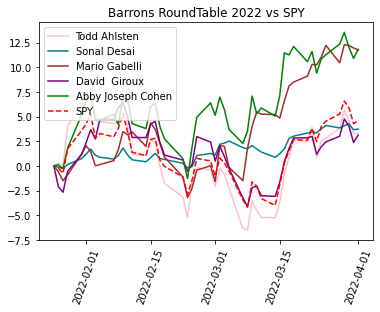

In [29]:

#ploting portfolio and benchmark
plt.plot(finalPortfolio_cume_chg_1, color='pink',label = portfolio1_remark)
plt.plot(finalPortfolio_cume_chg_2, color='teal',label = portfolio2_remark)
plt.plot(finalPortfolio_cume_chg_3, color='brown',label = portfolio3_remark)
plt.plot(finalPortfolio_cume_chg_4, color='purple',label = portfolio4_remark)
plt.plot(finalPortfolio_cume_chg_5, color='green',label = portfolio5_remark)


plt.plot(bench_cume_chg,'--',color='red',label = "SPY")
plt.xticks(rotation=70)
plt.title("Barrons RoundTable 2022 vs SPY")
plt.legend(loc='upper left')